In [1]:
import json

import pandas as pd

#df = pd.concat([
#    pd.read_parquet('final/final-train.parquet'),
#    pd.read_parquet('final/final-val.parquet'),
#    pd.read_parquet('final/final-test.parquet')
#])

In [2]:
from datasets import load_dataset
import pandas as pd

dataset_id = '2024-mcm-everitt-ryan/benchmark'
dataset = load_dataset(dataset_id)

df_train = dataset['train'].to_pandas()
df_val = dataset['val'].to_pandas()
df_test = dataset['test'].to_pandas()

df = pd.concat([df_train, df_val, df_test])

print(f'Train shape: {df_train.shape} {len(df_train) * 100.0 / len(df):.2f}% Split')
print(f'Val shape: {df_val.shape} {len(df_val) * 100.0 / len(df):.2f}% Split')
print(f'Test shape: {df_test.shape} {len(df_test) * 100.0 / len(df):.2f}% Split')

Train shape: (3090, 13) 72.42% Split
Val shape: (593, 13) 13.90% Split
Test shape: (584, 13) 13.69% Split


In [3]:
df_verified = df[df['verified'] == True]
df_train_verified = df_train[df_train['verified'] == True]
df_val_verified = df_val[df_val['verified'] == True]
df_test_verified = df_test[df_test['verified'] == True]

print(f'Train verified: {df_train_verified.shape} {len(df_train_verified) * 100.0 / len(df_verified):.2f}% Split')
print(f'Val verified: {df_val_verified.shape} {len(df_val_verified) * 100.0 / len(df_verified):.2f}% Split')
print(f'Test verified: {df_test_verified.shape} {len(df_test_verified) * 100.0 / len(df_verified):.2f}% Split')

Train verified: (1439, 13) 55.01% Split
Val verified: (593, 13) 22.67% Split
Test verified: (584, 13) 22.32% Split


In [4]:
df_train[['label_age', 'label_disability', 'label_feminine',
       'label_general', 'label_masculine', 'label_neutral', 'label_racial',
       'label_sexuality', 'verified', 'synthetic']].sum()

label_age            481
label_disability     494
label_feminine       439
label_general        561
label_masculine      460
label_neutral       1192
label_racial         503
label_sexuality      507
verified            1439
synthetic           2718
dtype: int64

In [5]:
df_val[['label_age', 'label_disability', 'label_feminine',
       'label_general', 'label_masculine', 'label_neutral', 'label_racial',
       'label_sexuality', 'verified', 'synthetic']].sum()

label_age            80
label_disability     80
label_feminine       80
label_general        80
label_masculine      80
label_neutral        80
label_racial         80
label_sexuality      80
verified            593
synthetic           386
dtype: int64

In [6]:
df_test[['label_age', 'label_disability', 'label_feminine',
       'label_general', 'label_masculine', 'label_neutral', 'label_racial',
       'label_sexuality', 'verified', 'synthetic']].sum()

label_age            80
label_disability     80
label_feminine       80
label_general        80
label_masculine      80
label_neutral        80
label_racial         80
label_sexuality      80
verified            584
synthetic           376
dtype: int64

In [7]:

df.head(3)

,id,label_age,label_disability,label_feminine,label_general,label_masculine,label_neutral,label_racial,label_sexuality,text,verified,synthetic,metadata
0,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,False,False,False,False,True,False,False,"Company: Barker, Pierce and Banks\nJob Title: ...",True,True,"{""position"": ""standards specialist"", ""inferenc..."
1,Kaggle::techmap::614a798e287b955e077cff75::mon...,False,False,False,False,False,True,False,False,5-7 years of relevant work experience. \nExce...,True,False,"{""document_id"": ""Kaggle::techmap::614a798e287b..."
2,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,False,False,False,False,True,False,False,"Data and Technology Analyst at Hall, Johnson a...",True,True,"{""position"": ""data and technology analyst"", ""i..."


In [8]:
print(f"Column Names: {df.columns}")
print(f"Columns: {len(df.columns)}")
print(f"Rows: {len(df)}")

df_real = df[df['synthetic'] == False]
df_synthetic = df[df['synthetic'] == True]

print(f"Real: {len(df_real)}")
print(f"Synthetic: {len(df_synthetic)}")
print(f"Real-Verified: {len(df_real[df_real['verified'] == True])}")
print(f"Real-Unverified: {len(df_real[df_real['verified'] == False])}")
print(f"Synthetic-Verified: {len(df_synthetic[df_synthetic['verified'] == True])}")
print(f"Synthetic-Unverified: {len(df_synthetic[df_synthetic['verified'] == False])}")

Column Names: Index(['id', 'label_age', 'label_disability', 'label_feminine',
       'label_general', 'label_masculine', 'label_neutral', 'label_racial',
       'label_sexuality', 'text', 'verified', 'synthetic', 'metadata'],
      dtype='object')
Columns: 13
Rows: 4267
Real: 787
Synthetic: 3480
Real-Verified: 787
Real-Unverified: 0
Synthetic-Verified: 1829
Synthetic-Unverified: 1651


In [9]:
label_columns = [col for col in df.columns if col.startswith('label_')]
analysis_columns = [col for col in df.columns if col.startswith('analysis_')]
categories = [col.replace('label_', '') for col in label_columns]
text_column = 'text'

print(f"Categories: {categories}")
print(f"Labels: {label_columns}")
print(f"Analysis: {analysis_columns}")
print(f"Input: {text_column}")

print(f"\nRows: {len(df)}")
for category in categories:
    label = f"label_{category}"
    bias = len(df[df[label] == True])
    unbiased = len(df[df[label] == False])
    print(f"\t{category}: {bias} biased, {unbiased} unbiased")

non_neutral = df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
neutral = df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()
print(f'\tHas at least one bias category: {non_neutral} ({non_neutral / len(df):.2%})')
print(f'\tHas no bias categories: {neutral} ({neutral / len(df):.2%})')


Categories: ['age', 'disability', 'feminine', 'general', 'masculine', 'neutral', 'racial', 'sexuality']
Labels: ['label_age', 'label_disability', 'label_feminine', 'label_general', 'label_masculine', 'label_neutral', 'label_racial', 'label_sexuality']
Analysis: []
Input: text

Rows: 4267
	age: 641 biased, 3626 unbiased
	disability: 654 biased, 3613 unbiased
	feminine: 599 biased, 3668 unbiased
	general: 721 biased, 3546 unbiased
	masculine: 620 biased, 3647 unbiased
	neutral: 1352 biased, 2915 unbiased
	racial: 663 biased, 3604 unbiased
	sexuality: 667 biased, 3600 unbiased
	Has at least one bias category: 4267 (100.00%)
	Has no bias categories: 0 (0.00%)


In [10]:
metadata_columns = ['document_id', 'country', 'source', 'company', 'position']

for col in metadata_columns:
    df[col] = None

for idx, sample in df.iterrows():
    j = sample['metadata']
    md = json.loads(j)
    if sample['synthetic']:
        m = md.get('model').split(':')[-1]
        m = m.lower()
        if 'llama' in m:
            m = 'llama-3-70b'
        elif 'gpt-4o' in m:
            m = 'gpt-4o'
        df.at[idx, 'type'] = m
    else:
        df.at[idx, 'type'] = 'Real'
        for col in metadata_columns:
            df.at[idx, col] = md.get(col)

In [11]:
df.head(10)

,id,label_age,label_disability,label_feminine,label_general,label_masculine,label_neutral,label_racial,label_sexuality,text,verified,synthetic,metadata,document_id,country,source,company,position,type
0,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,False,False,False,False,True,False,False,"Company: Barker, Pierce and Banks\nJob Title: ...",True,True,"{""position"": ""standards specialist"", ""inferenc...",Kaggle::techmap::613a9a4037da2652e814cca3::hea...,RU,headhunter_ru,English Zone,Moderator ( English Teacher ),Real
1,Kaggle::techmap::614a798e287b955e077cff75::mon...,False,False,False,False,False,True,False,False,5-7 years of relevant work experience. \nExce...,True,False,"{""document_id"": ""Kaggle::techmap::614a798e287b...",Kaggle::techmap::615ddc008faf5f1e4d7b19c3::lin...,IQ,linkedin_iq,Mercy Corps,"Country Director - Baghdad, Iraq",Real
2,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,False,False,False,False,True,False,False,"Data and Technology Analyst at Hall, Johnson a...",True,True,"{""position"": ""data and technology analyst"", ""i...",Kaggle::techmap::614c3db2bfb8e7511d3aba1f::car...,US,careerbuilder_us,Kiewit,Equipment Superintendent - Kiewit Equipment Se...,Real
3,Kaggle::techmap::614d3714463aa27e3dae34a9::see...,False,False,False,False,False,True,False,False,Experienced Heavy Rigid Drivers\n\nABOUT THE C...,True,False,"{""document_id"": ""Kaggle::techmap::614d3714463a...",Kaggle::techmap::61508ed4588a926c6ffbc8a7::bri...,UK,britishjobs_uk,Pareto,Graduate Sales Manager,Real
4,Kaggle::techmap::615a79907b7b7c7cc61ec029::see...,False,True,False,False,True,False,False,False,3 MONTH CONTRACT. IMMEDIATE START. RESIDENTIAL...,True,False,"{""document_id"": ""Kaggle::techmap::615a79907b7b...",Kaggle::techmap::614d8945a2b40b64d3121dbd::lin...,NG,linkedin_ng,TechHerNG,Program Officer,Real
5,Synthetic:gpt-4o-2024-05-13:20240629011915:neu...,False,False,False,False,False,True,False,False,Company Background:\nRichardson and Sons is a ...,True,True,"{""position"": ""triage supervisor"", ""inference_t...",Kaggle::techmap::613ab02a37da2652e814d545::hea...,RU,headhunter_ru,LATOKEN,Recruiter,Real
6,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,False,False,False,False,True,False,False,"Company: Chen, Ramos and Edwards\n\nJob Title:...",True,True,"{""position"": ""Principal Release Engineer / Rel...",Kaggle::techmap::6136c63f18e520633201b7cb::ree...,UK,reed_uk,Blueprint Recruitment Solutions,Internal Recruiter,Real
7,Kaggle::techmap::6149f381f04ffe48df1fb540::hea...,False,False,False,False,False,True,False,False,Job Description: \nIdentify inherent hazards ...,True,False,"{""document_id"": ""Kaggle::techmap::6149f381f04f...",Kaggle::techmap::615cd5fa4c0c155bc7555f19::sna...,US,snagajob_us,Footprint Retail Services,Gift Card Merchandiser,Real
8,Kaggle::techmap::6162a6b6cecd920a1e332c25::mon...,False,False,False,False,False,True,False,False,Description\n\nThe Forcepoint Security Labs te...,True,False,"{""document_id"": ""Kaggle::techmap::6162a6b6cecd...",Kaggle::techmap::613fc8adff961119564fbe5a::see...,AU,seek_au,360 Personnel,Civil Construction Worker,Real
9,Synthetic:gpt-4o-2024-05-13:20240628001357:neu...,False,False,False,False,False,True,False,False,"Company Background:\nDay, Hicks and Anderson i...",True,True,"{""position"": ""qa senior auditor"", ""inference_t...",Kaggle::techmap::6155e550c3a99e7015a50f99::lin...,RO,linkedin_ro,METRO Romania,Internship - Finance Department,Real


In [12]:
import json

documents = set()
phrases = set()
countries = set()
websites = set()
companies = set()
roles = set()
synthetics = set()
real = set()

for idx, sample in df.iterrows():
    phrases.add(sample['id'])
    if sample['synthetic']:
        synthetics.add(sample['id'])
    else:
        real.add(sample['id'])
        j = sample['metadata']
        md = json.loads(j)
        documents.add(md['document_id'])
        countries.add(md['country'])
        websites.add(md['source'])
        companies.add(md['company'])
        roles.add(md['position'])

print(f"Documents: {len(documents)}")
print(f"Phrases: {len(phrases)}")
print(f"Countries: {len(countries)}")
print(f"Websites: {len(websites)}")
print(f"Companies: {len(companies)}")
print(f"Roles: {len(roles)}")

Documents: 785
Phrases: 4267
Countries: 66
Websites: 108
Companies: 688
Roles: 764


In [13]:
import pandas as pd


def value_stats(dataframe, column, format_counts=True):
    counts = dataframe[column].value_counts()
    percentages = (dataframe[column].value_counts(normalize=True) * 100).round(2)

    dataframe = pd.DataFrame({'Count': counts, 'Percentage': percentages.astype(str) + '%'})

    if format_counts:
        dataframe['Count'] = dataframe['Count'].apply('{:,}'.format)
    return dataframe


In [14]:
df_real = df[df['synthetic'] == False]
print(f'Real samples: {len(df_real)}')

Real samples: 787


In [15]:
df_real.head(3)

,id,label_age,label_disability,label_feminine,label_general,label_masculine,label_neutral,label_racial,label_sexuality,text,verified,synthetic,metadata,document_id,country,source,company,position,type
1,Kaggle::techmap::614a798e287b955e077cff75::mon...,False,False,False,False,False,True,False,False,5-7 years of relevant work experience. \nExce...,True,False,"{""document_id"": ""Kaggle::techmap::614a798e287b...",Kaggle::techmap::615ddc008faf5f1e4d7b19c3::lin...,IQ,linkedin_iq,Mercy Corps,"Country Director - Baghdad, Iraq",Real
3,Kaggle::techmap::614d3714463aa27e3dae34a9::see...,False,False,False,False,False,True,False,False,Experienced Heavy Rigid Drivers\n\nABOUT THE C...,True,False,"{""document_id"": ""Kaggle::techmap::614d3714463a...",Kaggle::techmap::61508ed4588a926c6ffbc8a7::bri...,UK,britishjobs_uk,Pareto,Graduate Sales Manager,Real
4,Kaggle::techmap::615a79907b7b7c7cc61ec029::see...,False,True,False,False,True,False,False,False,3 MONTH CONTRACT. IMMEDIATE START. RESIDENTIAL...,True,False,"{""document_id"": ""Kaggle::techmap::615a79907b7b...",Kaggle::techmap::614d8945a2b40b64d3121dbd::lin...,NG,linkedin_ng,TechHerNG,Program Officer,Real


In [16]:
value_stats(df_real, 'country')

,Count,Percentage
country,,
US,201,25.54%
UK,104,13.21%
AU,58,7.37%
CA,35,4.45%
RU,33,4.19%
...,...,...
TW,1,0.13%
MT,1,0.13%
ID,1,0.13%


In [17]:
value_stats(df_real, 'source')

,Count,Percentage
source,,
careerbuilder_us,63,8.01%
seek_au,58,7.37%
aarp_us,46,5.84%
britishjobs_uk,35,4.45%
reed_uk,34,4.32%
...,...,...
monster2_fr,1,0.13%
linkedin_gr,1,0.13%
linkedin_bo,1,0.13%


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import json


def plot_by_category(dataframe, x_ideal=200):
    melted_df = dataframe.melt(id_vars='type', value_vars=label_columns, var_name='categories')
    melted_df = melted_df[melted_df['value'] == 1]

    real_df = dataframe[dataframe['synthetic'] == False]
    synthetic_df = dataframe[dataframe['synthetic'] == True]
    gpt4_df = dataframe[dataframe['type'] == 'gpt-4o']
    llama3_df = dataframe[dataframe['type'] == 'llama-3-70b']

    non_neutral_real = real_df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
    neutral_real = real_df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()

    non_neutral_synthetic = synthetic_df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
    neutral_synthetic = synthetic_df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()

    gpt4o_synthetic = gpt4_df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
    llama3_synthetic = llama3_df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()

    total_real_str = '{:,.0f}'.format(len(real_df))
    total_synthetic_str = '{:,.0f}'.format(len(synthetic_df))
    total_gpt4o_str = '{:,.0f}'.format(len(gpt4_df))
    total_llama3_str = '{:,.0f}'.format(len(llama3_df))

    pivot_df = melted_df.pivot_table(index='categories', columns='type', aggfunc='size', fill_value=0)
    pivot_df.index = pivot_df.index.str.replace('label_', '')
    pivot_df = pivot_df.sort_values(by='Real', ascending=True)
    #pivot_df = pivot_df.rename(columns={True: 'Synthetic', False: 'Real'})

    plt.figure(figsize=(25, 25))
    #color=['#6495ED', '#FFA500', '#32CD32']
    bar_plot = pivot_df.plot(kind='barh', stacked=True, color=['#027eb5', '#ff9457', '#56c596'])
    
    total_values = pivot_df.sum(axis=1)

    for index, value in enumerate(total_values):
        plt.text(1600, index,
                 f' {value}',
                 verticalalignment='center',
                 fontsize=16)

    #plt.title('Verified Biased Job Descriptions', fontsize=18)
    plt.xlabel('', fontsize=16)
    plt.ylabel('', fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks([0,500,1000,1500],fontsize=16)

    plt.legend([f'{total_real_str} Real', f'{total_gpt4o_str} GPT-4o', f'{total_llama3_str} Llama3-70B'], loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=16, title='')


    for rect in bar_plot.patches:
        width, height = rect.get_width(), rect.get_height()
        x, y = rect.get_xy()
        bar_plot.text(width / 2 + x, y + height / 2,
                      '{:.0f}'.format(width),
                      ha='center',
                      va='center',
                      color='000000',
                      weight='bold',
                      fontsize=18)

    # Set x limit 25% more than max value
    plt.xlim(0, 1500)

    # Draw a vertical line at x = 200
    if x_ideal:
        plt.axvline(x=x_ideal, color="red", linestyle='--')

    plt.show()


def plot_neutral_vs_bias(dataframe):
    real_df = dataframe[dataframe['synthetic'] == False]
    synthetic_df = dataframe[dataframe['synthetic'] == True]
    llama_df = dataframe[dataframe['type'] == True]

    non_neutral_real = real_df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
    neutral_real = real_df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()

    non_neutral_synthetic = synthetic_df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
    neutral_synthetic = synthetic_df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()

    #print(f'non neutral synthetic: {non_neutral_synthetic}')
    #print(f'non neutral real: {non_neutral_real}')
    #print(f'neutral synthetic: {neutral_synthetic}')
    #print(f'neutral real: {neutral_real}')

    total_real_str = '{:,.0f}'.format(non_neutral_real + neutral_real)
    total_synthetic_str = '{:,.0f}'.format(non_neutral_synthetic + neutral_synthetic)
    neutral_str = '{:,.0f} Neutral'.format(neutral_synthetic + neutral_real)
    bias_cont_str = '{:,.0f} Bias'.format(non_neutral_synthetic + non_neutral_real)
    total_str = '{:,.0f}'.format(non_neutral_synthetic + neutral_synthetic + neutral_real + non_neutral_real)

    data = {'Category': [bias_cont_str, bias_cont_str, neutral_str, neutral_str],
            'Count': [non_neutral_synthetic, non_neutral_real, neutral_synthetic, neutral_real],
            'synthetic': ['Synthetic', 'Real', 'Synthetic', 'Real']}
    synth_df = pd.DataFrame(data)

    plt.figure(figsize=(20, 10))

    bar_plot = synth_df['Count'].groupby([synth_df['Category'], synth_df['type']]).sum().unstack().plot.barh(
        stacked=True, color=['#6495ED', '#FFA500', '#228B22'])

    plt.title(f'{total_str} Verified Job Descriptions', fontsize=18)
    plt.xlabel('', fontsize=16)
    plt.ylabel('', fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.legend([
        f'{total_real_str} Real',
        f'{total_synthetic_str} Synthetic'
    ],loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16, title='')

    patches = bar_plot.patches
    values = [non_neutral_real, neutral_real, non_neutral_synthetic, neutral_synthetic]

    # Display values for each segment
    for patch, value in zip(patches, values):
        width, height = patch.get_width(), patch.get_height()
        x, y = patch.get_xy()
        bar_plot.text(width / 2 + x, y + height / 2,
                      '{:,.0f}'.format(value),
                      ha='center',
                      va='center',
                      color='black',
                      fontsize=18)

    plt.show()


def plot_by_models(dataframe):
    dataframe = dataframe[dataframe['synthetic'] == True]

    models = {}

    for meta in dataframe['metadata']:
        meta = json.loads(meta)
        model_name = meta['model']
        model_name = model_name.split(':')[-1]
        if model_name not in models:
            models[model_name] = 1
        else:
            models[model_name] += 1

    dataframe = pd.DataFrame(list(models.items()), columns=['Model', 'Count'])

    #model_names = dataframe['Model']
    model_counts = dataframe['Count']

    plt.figure(figsize=(10, 5))

    bar_plot = dataframe['Count'].groupby(dataframe['Model']).sum().plot.barh(color='#6495ED')

    plt.title('Verified Synthetic Job Descriptions', fontsize=18)
    plt.xlabel('', fontsize=16)
    plt.ylabel('', fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    patches = bar_plot.patches

    # Display values for each segment
    for patch, count in zip(patches, model_counts):
        width, height = patch.get_width(), patch.get_height()
        x, y = patch.get_xy()
        bar_plot.text(width / 2 + x, y + height / 2,
                      '{:,.0f}'.format(count),
                      ha='center',
                      va='center',
                      color='black',
                      fontsize=18)
    plt.show()

<Figure size 2500x2500 with 0 Axes>

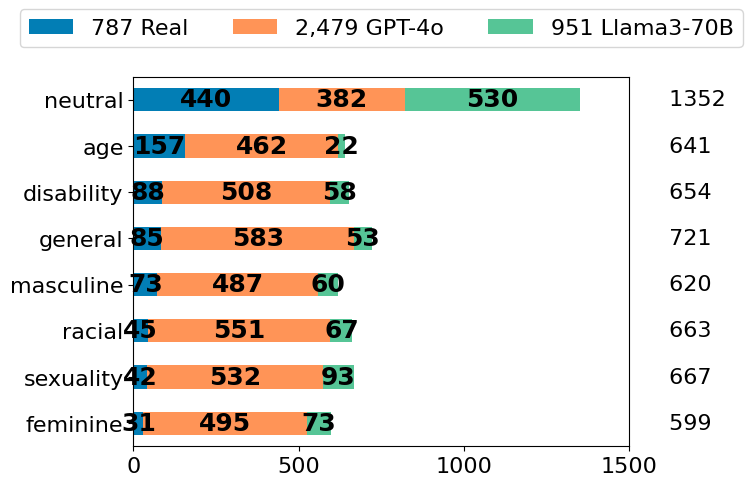

In [19]:
plot_by_category(df, None)

In [20]:
plot_neutral_vs_bias(df)

KeyError: 'type'

<Figure size 2000x1000 with 0 Axes>

In [ ]:
plot_by_models(df)

High entropy indicates that the label distribution is fairly uniform, and no single label dominates.
This suggests a balanced dataset.

The maximum entropy occurs when all labels are equally probable.
The maximum entropy can be calculated using the formula: log_2(n)

In [ ]:
import numpy as np

# Calculate entropy for labels in dataset.
# Source: https://colab.research.google.com/drive/1pddMaJJIHR0O8MND42hfzYRxOPMV82KA?usp=sharing#scrollTo=RkVuiK_loty4

def categorical_entropy(df: pd.DataFrame, labels: list):
    # Calculate frequency for each label 
    label_frequency = df[labels].sum()

    # Calculate probabilities for each label
    label_probabilities = label_frequency / label_frequency.sum()

    # Calculate entropy
    entropy = -np.sum(label_probabilities * np.log2(label_probabilities))

    return entropy

In [ ]:
# entropy for original dataset
categorical_entropy(df, label_columns)

In [ ]:

import math

max_entropy = math.log2(len(label_columns))
max_entropy_data = {"Dataset": "Maximum Entropy Possible", "Entropy": max_entropy}
max_entropy_data